# Sprint2　機械学習スクラッチ入門  
＜Sprintの目的＞  
機械学習スクラッチの準備をする

＜どのように学ぶか＞  
今後の機械学習スクラッチ課題で作成するモデルを、scikit-learnを用いて一度動かしておきます。これまでの復習を兼ねたスクラッチ課題の準備です。  

このSprintでは機械学習手法のスクラッチ課題に取り組む準備を行います。scikit-learnを用いて分類・回帰問題を解くコードを書いておき、今後のSprintではそれと同じ動作をするクラスをスクラッチで作成していきます。

### 【問題1】train_test_splitのスクラッチ  
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。
なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [6]:
def scratch_train_test_split(X, y, train_size=0.8, random_state=None, stratify=False):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定
    random_state : int or None
      乱数発生器
    stratify : True or False
      正解ラベル（y）で層化するか指定
      

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    # データ読み込み、乱数シード設定
    import numpy as np
    import random
    n_samples = len(y)
    y = y[:, np.newaxis]
    data = np.hstack([X, y])
    np.random.seed(random_state)
    
    # デフォルト設定はyでの層化なし
    if stratify == False:
        np.random.shuffle(data)
        n_train = int(n_samples * train_size)
        X_train = data[:n_train, :-1]
        y_train = data[:n_train, -1][:, np.newaxis]
        X_test = data[n_train:, :-1]
        y_test = data[n_train:, -1][:, np.newaxis]
    
    # 層化の場合、yラベルごとにデータを取得し分割
    else:
        elements, counts = np.unique(y, return_counts=True)
        for i in range(len(elements)):
            indices = np.where(y == elements[i])
            data_i = data[indices[0], :]
            np.random.shuffle(data_i)
            n_train = int(counts[i] * train_size)
            if i == 0:
                X_train = data_i[:n_train, :-1]
                y_train = data_i[:n_train, -1][:, np.newaxis]
                X_test = data_i[n_train:, :-1]
                y_test = data_i[n_train:, -1][:, np.newaxis]
            else:
                X_train = np.vstack([X_train, data_i[:n_train, :-1]])
                y_train = np.vstack([y_train, data_i[:n_train, -1][:, np.newaxis]])
                X_test = np.vstack([X_test, data_i[n_train:, :-1]])
                y_test = np.vstack([y_test, data_i[n_train:, -1][:, np.newaxis]])

    y_train = y_train.flatten()
    y_test = y_test.flatten()
    return X_train, X_test, y_train, y_test

In [7]:
# 確認のため、irisデータ取得
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
# virgicolorとvirginica(51行目以降)を抽出
# sepal_lengthとpetal_length(1,3列目)を抽出
X = iris.data[50:, [0, 2]]
y = iris.target[50:]

print(np.shape(X))
print(np.shape(y))

(100, 2)
(100,)


In [8]:
# scirkit learnの動作確認
from sklearn.model_selection import train_test_split

# 層化を無効にして分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

print('< scirkit learn >')
print('X_train : {}'.format(np.shape(X_train)))
print('y_train : {}'.format(np.shape(y_train)))
print('X_test : {}'.format(np.shape(X_test)))
print('y_test : {}'.format(np.shape(y_test)))

# 層化されているか確認
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

< scirkit learn >
X_train : (80, 2)
y_train : (80,)
X_test : (20, 2)
y_test : (20,)
Labels counts in y: [ 0 50 50]
Labels counts in y_train: [ 0 37 43]
Labels counts in y_test: [ 0 13  7]


In [9]:
# scirkit learnの動作確認
from sklearn.model_selection import train_test_split

# 層化を有効にして分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

print('< scirkit learn >')
print('X_train : {}'.format(np.shape(X_train)))
print('y_train : {}'.format(np.shape(y_train)))
print('X_test : {}'.format(np.shape(X_test)))
print('y_test : {}'.format(np.shape(y_test)))

# 層化されているか確認
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

< scirkit learn >
X_train : (80, 2)
y_train : (80,)
X_test : (20, 2)
y_test : (20,)
Labels counts in y: [ 0 50 50]
Labels counts in y_train: [ 0 40 40]
Labels counts in y_test: [ 0 10 10]


In [10]:
# スクラッチの動作確認(層化無効)
X_train, X_test, y_train, y_test = scratch_train_test_split(
    X, y, train_size=0.8, random_state=1, stratify=False)
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

print('< scratch >')
print('X_train : {}'.format(np.shape(X_train)))
print('y_train : {}'.format(np.shape(y_train)))
print('X_test : {}'.format(np.shape(X_test)))
print('y_test : {}'.format(np.shape(y_test)))

# 層化されているか確認
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

< scratch >
X_train : (80, 2)
y_train : (80,)
X_test : (20, 2)
y_test : (20,)
Labels counts in y: [ 0 50 50]
Labels counts in y_train: [ 0 37 43]
Labels counts in y_test: [ 0 13  7]


In [11]:
# スクラッチの動作確認(層化有効)
X_train, X_test, y_train, y_test = scratch_train_test_split(
    X, y, train_size=0.8, random_state=1, stratify=True)
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

print('< scratch >')
print('X_train : {}'.format(np.shape(X_train)))
print('y_train : {}'.format(np.shape(y_train)))
print('X_test : {}'.format(np.shape(X_test)))
print('y_test : {}'.format(np.shape(y_test)))

# 層化されているか確認
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

< scratch >
X_train : (80, 2)
y_train : (80,)
X_test : (20, 2)
y_test : (20,)
Labels counts in y: [ 0 50 50]
Labels counts in y_train: [ 0 40 40]
Labels counts in y_test: [ 0 10 10]


### 【問題2】分類問題を解くコードの作成 
scikit-learnを使ったコードを作成していきます。
検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。

分類は3種類の手法をスクラッチします。

- ロジスティック回帰
- SVM
- 決定木

ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数でloss="log"とすることでロジスティック回帰の計算になります。

データセットは3種類用意します。

1つ目は事前学習期間同様にirisデータセットです。
2値分類としたいため、virgicolorとvirginicaの2つの目的変数のみ利用します。特徴量は4種類全て使います。

残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。

上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

In [12]:
import pandas as pd

# irisデータセット
iris = datasets.load_iris()

# virgicolorとvirginica(51行目以降)を抽出
# 特徴量は4つ全て
X = iris.data[50:, :]
y = iris.target[50:][:, np.newaxis]
data = np.hstack([X, y])
df_iris = pd.DataFrame(data, columns=['sepal_length', 
                                     'sepal_width', 
                                     'petal_length', 
                                     'petal_width',
                                     'Species'])
print('< Iris >')
display(df_iris.head())
display(np.shape(df_iris))

< Iris >


,sepal_length,sepal_width,petal_length,petal_width,Species
0,7.0,3.2,4.7,1.4,1.0
1,6.4,3.2,4.5,1.5,1.0
2,6.9,3.1,4.9,1.5,1.0
3,5.5,2.3,4.0,1.3,1.0
4,6.5,2.8,4.6,1.5,1.0


(100, 5)

In [13]:
# シンプルデータセット1
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index][:, np.newaxis]

data = np.hstack([X, y])
df_1 = pd.DataFrame(data, columns=['f0', 'f1', 'class'])
print('< Sample 1 >')
display(df_1.head())
display(np.shape(df_1))

< Sample 1 >


,f0,f1,class
0,0.772383,-2.291673,-1.0
1,-0.593349,1.667883,1.0
2,-2.076486,0.487468,1.0
3,0.119227,3.625380,1.0
4,-3.130006,-0.156732,1.0


(500, 3)

In [14]:
# シンプルデータセット2
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

y = y[:, np.newaxis]
data = np.hstack([X, y])
df_2 = pd.DataFrame(data, columns=['f0', 'f1', 'class'])
print('< Sample 2 >')
display(df_2.head())
display(np.shape(df_2))

< Sample 2 >


,f0,f1,class
0,-0.44699,-2.8073,0.0
1,-1.46210,-2.4586,0.0
2,0.10645,1.9242,0.0
3,-3.59440,-4.0112,0.0
4,-0.98880,4.5718,0.0


(40, 3)

In [15]:
# 前処理関数
from sklearn.preprocessing import StandardScaler

def split_standardize(X, y, train_size=0.75, Stratify=True):
    X_train, X_test, y_train, y_test = scratch_train_test_split(
        X, y, train_size, stratify=Stratify)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    return X_train_std, X_test_std, y_train, y_test

In [16]:
# 決定境界描画関数
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
%matplotlib inline

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, n_features)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [17]:
# 評価指標値を格納するセットを作成
ACCs = []
PREs = []
RCLs = []
F1s = []

# 評価関数
from sklearn import metrics 

def evaluate(y_true, y_pred):
    """
    2値分類の評価指標を計算する
    """
    acc = metrics.accuracy_score(y_test, y_pred)
    ACCs.append(acc)
    precision = metrics.precision_score(y_test, y_pred)
    PREs.append(precision)
    recall = metrics.recall_score(y_test, y_pred)
    RCLs.append(recall)
    f1 = metrics.f1_score(y_test, y_pred)
    F1s.append(f1)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, confusion

=== Logistic Regression ===

< Iris >


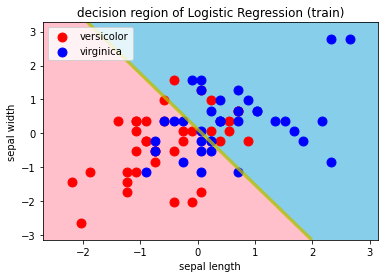

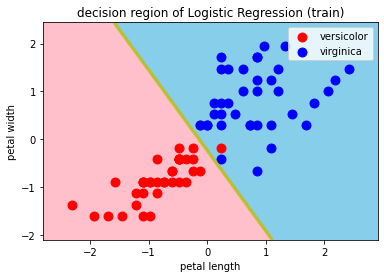

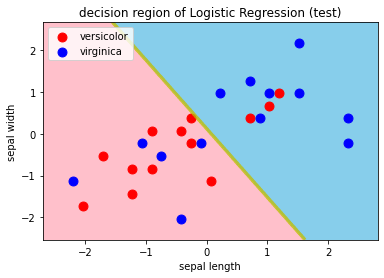

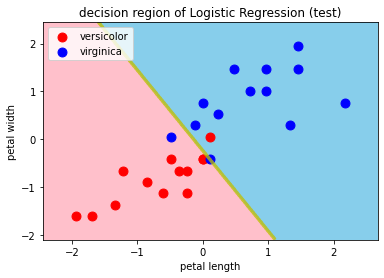

Accuracy : 0.846
Precision : 0.846
Recall : 0.846
F1 : 0.846
confusion matrix 
 [[11  2]
 [ 2 11]]

< Sample 1 >


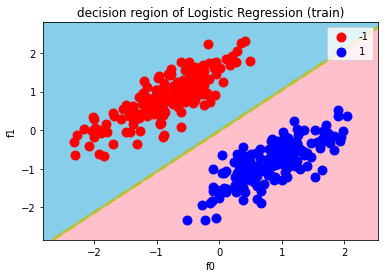

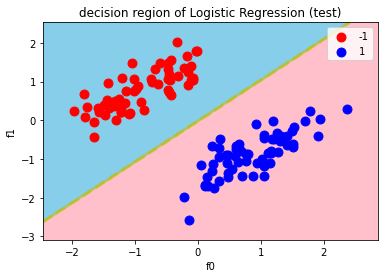

Accuracy : 1.000
Precision : 1.000
Recall : 1.000
F1 : 1.000
confusion matrix 
 [[63  0]
 [ 0 63]]

< Sample 2 >


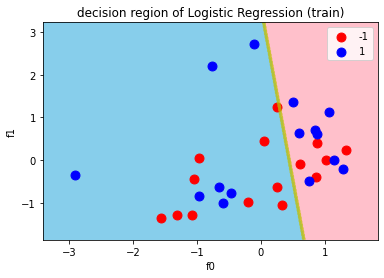

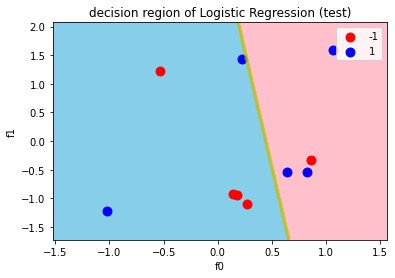

Accuracy : 0.300
Precision : 0.333
Recall : 0.400
F1 : 0.364
confusion matrix 
 [[1 4]
 [3 2]]



In [18]:
# ロジスティック回帰
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

# iris可視化のため3つのインスタンス作成
sgd = SGDClassifier(loss="log")
sgd_1 = SGDClassifier(loss="log")
sgd_2 = SGDClassifier(loss="log")

# 学習・評価・可視化
data_names = ['Iris', 'Sample 1', 'Sample 2']
data_set = [df_iris, df_1, df_2]
print("=== Logistic Regression ===\n")
for name, data in zip(data_names, data_set):
    print('< {} >'.format(name))
    # データ取得
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    # 前処理
    X_train_std, X_test_std, y_train, y_test = split_standardize(
        X, y, train_size=0.75, Stratify=True)
    # 学習・推論
    if name == "Iris":
        # irisデータの場合は全体と変数2つずつの3パターン学習
        sgd.fit(X_train_std, y_train)
        y_pred = sgd.predict(X_test_std)
        X1_train_std = X_train_std[:, :2]
        X2_train_std = X_train_std[:, 2:]
        X1_test_std = X_test_std[:, :2]
        X2_test_std = X_test_std[:, 2:]
        sgd_1.fit(X1_train_std, y_train)
        sgd_2.fit(X2_train_std, y_train)
    else:
        sgd.fit(X_train_std, y_train)
        y_pred = sgd.predict(X_test_std)
        
    # 可視化
    if name == "Iris":
        decision_region(X1_train_std, y_train, sgd_1, 
                        title="decision region of Logistic Regression (train)",
                        xlabel='sepal length', ylabel='sepal width', target_names=['versicolor', 'virginica'])
        decision_region(X2_train_std, y_train, sgd_2,
                        title="decision region of Logistic Regression (train)",
                        xlabel='petal length', ylabel='petal width', target_names=['versicolor', 'virginica'])
        decision_region(X1_test_std, y_test, sgd_1, 
                        title="decision region of Logistic Regression (test)", 
                        xlabel='sepal length', ylabel='sepal width', target_names=['versicolor', 'virginica'])
        decision_region(X2_test_std, y_test, sgd_2, 
                        title="decision region of Logistic Regression (test)",
                        xlabel='petal length', ylabel='petal width', target_names=['versicolor', 'virginica'])
    else:
        decision_region(X_train_std, y_train, sgd, 
                        title="decision region of Logistic Regression (train)",
                        xlabel='f0', ylabel='f1', target_names=['-1', '1'])
        decision_region(X_test_std, y_test, sgd,
                        title="decision region of Logistic Regression (test)",
                        xlabel='f0', ylabel='f1', target_names=['-1', '1'])
        
    # 評価
    print("Accuracy : {:.3f}\nPrecision : {:.3f}\nRecall : {:.3f}\nF1 : {:.3f}\nconfusion matrix \n {}\n"
          .format(*evaluate(y_test, y_pred)))

=== Support Vector Machine ===

< Iris >


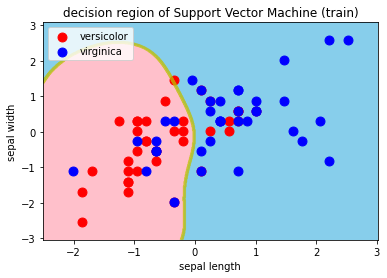

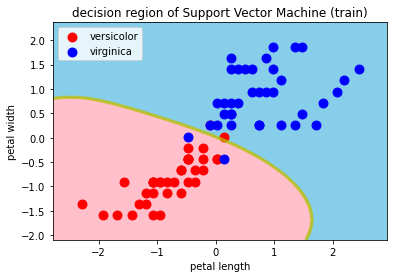

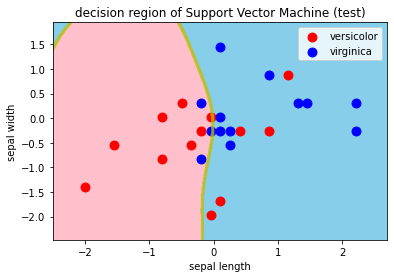

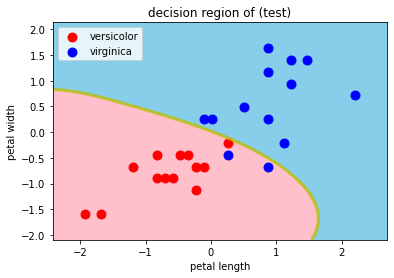

Accuracy : 0.923
Precision : 0.923
Recall : 0.923
F1 : 0.923
confusion matrix 
 [[12  1]
 [ 1 12]]

< Sample 1 >


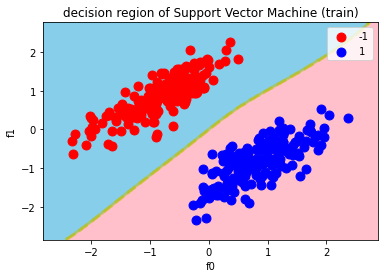

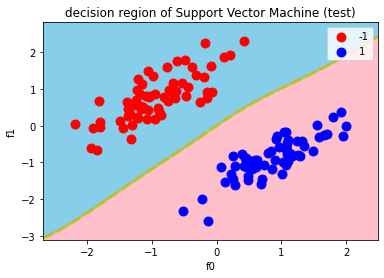

Accuracy : 1.000
Precision : 1.000
Recall : 1.000
F1 : 1.000
confusion matrix 
 [[63  0]
 [ 0 63]]

< Sample 2 >


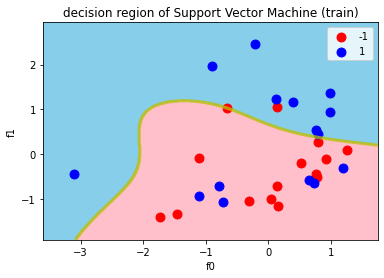

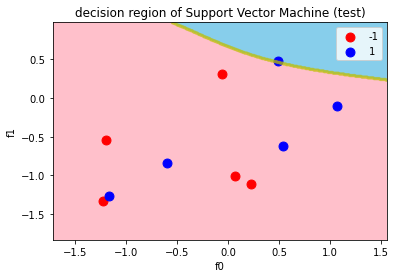

Accuracy : 0.600
Precision : 1.000
Recall : 0.200
F1 : 0.333
confusion matrix 
 [[5 0]
 [4 1]]



In [19]:
# サポートベクターマシン
from sklearn.svm import SVC

# iris可視化のため3つのインスタンス作成
svc = SVC()
svc_1 = SVC()
svc_2 = SVC()

# 学習・評価・可視化
model_name = "Support Vector Machine"
data_names = ['Iris', 'Sample 1', 'Sample 2']
data_set = [df_iris, df_1, df_2]
print("=== {} ===\n".format(model_name))
for name, data in zip(data_names, data_set):
    print('< {} >'.format(name))
    # データ取得
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    # 前処理
    X_train_std, X_test_std, y_train, y_test = split_standardize(
        X, y, train_size=0.75, Stratify=True)
    # 学習・推論
    if name == "Iris":
        # irisデータの場合は全体と変数2つずつの3パターン学習
        svc.fit(X_train_std, y_train)
        y_pred = svc.predict(X_test_std)
        X1_train_std = X_train_std[:, :2]
        X2_train_std = X_train_std[:, 2:]
        X1_test_std = X_test_std[:, :2]
        X2_test_std = X_test_std[:, 2:]
        svc_1.fit(X1_train_std, y_train)
        svc_2.fit(X2_train_std, y_train)
    else:
        svc.fit(X_train_std, y_train)
        y_pred = svc.predict(X_test_std)

    # 可視化
    if name == "Iris":
        decision_region(X1_train_std, y_train, svc_1, 
                        title="decision region of {} (train)".format(model_name),
                        xlabel='sepal length', ylabel='sepal width', target_names=['versicolor', 'virginica'])
        decision_region(X2_train_std, y_train, svc_2,
                        title="decision region of {} (train)".format(model_name),
                        xlabel='petal length', ylabel='petal width', target_names=['versicolor', 'virginica'])
        decision_region(X1_test_std, y_test, svc_1, 
                        title="decision region of {} (test)".format(model_name), 
                        xlabel='sepal length', ylabel='sepal width', target_names=['versicolor', 'virginica'])
        decision_region(X2_test_std, y_test, svc_2, 
                        title="decision region of (test)".format(model_name),
                        xlabel='petal length', ylabel='petal width', target_names=['versicolor', 'virginica'])
    else:
        decision_region(X_train_std, y_train, svc, 
                        title="decision region of {} (train)".format(model_name),
                        xlabel='f0', ylabel='f1', target_names=['-1', '1'])
        decision_region(X_test_std, y_test, svc,
                        title="decision region of {} (test)".format(model_name),
                        xlabel='f0', ylabel='f1', target_names=['-1', '1'])
        
    # 評価
    print("Accuracy : {:.3f}\nPrecision : {:.3f}\nRecall : {:.3f}\nF1 : {:.3f}\nconfusion matrix \n {}\n"
          .format(*evaluate(y_test, y_pred)))

=== Decision Tree ===

< Iris >


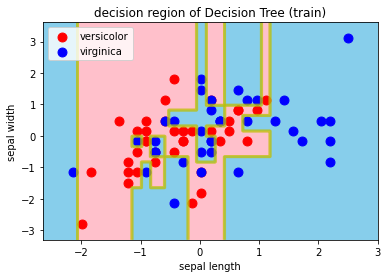

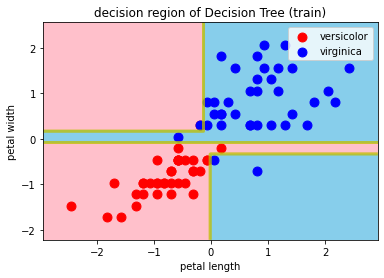

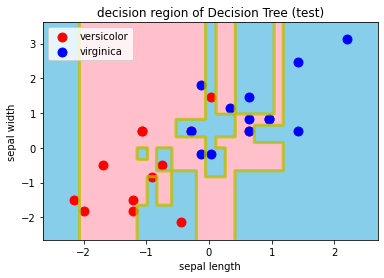

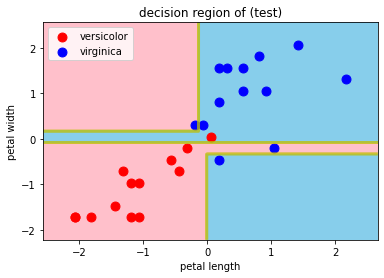

Accuracy : 0.885
Precision : 0.857
Recall : 0.923
F1 : 0.889
confusion matrix 
 [[12  1]
 [ 2 11]]

< Sample 1 >


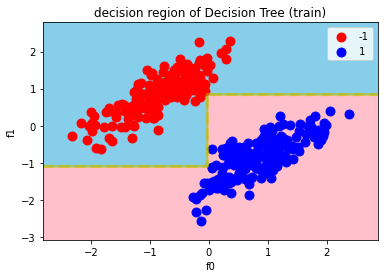

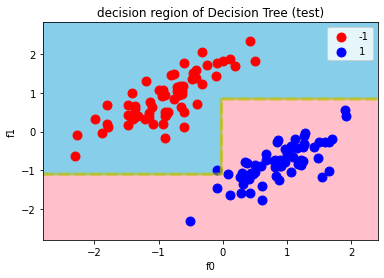

Accuracy : 0.992
Precision : 0.984
Recall : 1.000
F1 : 0.992
confusion matrix 
 [[62  1]
 [ 0 63]]

< Sample 2 >


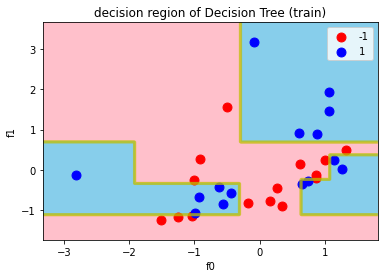

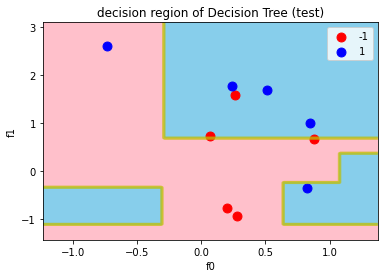

Accuracy : 0.700
Precision : 0.667
Recall : 0.800
F1 : 0.727
confusion matrix 
 [[3 2]
 [1 4]]



In [20]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

# iris可視化のため3つのインスタンス作成
tree = DecisionTreeClassifier()
tree_1 = DecisionTreeClassifier()
tree_2 = DecisionTreeClassifier()

# 学習・評価・可視化
model_name = "Decision Tree"
data_names = ['Iris', 'Sample 1', 'Sample 2']
data_set = [df_iris, df_1, df_2]
print("=== {} ===\n".format(model_name))
for name, data in zip(data_names, data_set):
    print('< {} >'.format(name))
    # データ取得
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    # 前処理
    X_train_std, X_test_std, y_train, y_test = split_standardize(
        X, y, train_size=0.75, Stratify=True)
    # 学習・推論
    if name == "Iris":
        # irisデータの場合は全体と変数2つずつの3パターン学習
        tree.fit(X_train_std, y_train)
        y_pred = tree.predict(X_test_std)
        X1_train_std = X_train_std[:, :2]
        X2_train_std = X_train_std[:, 2:]
        X1_test_std = X_test_std[:, :2]
        X2_test_std = X_test_std[:, 2:]
        tree_1.fit(X1_train_std, y_train)
        tree_2.fit(X2_train_std, y_train)
    else:
        tree.fit(X_train_std, y_train)
        y_pred = tree.predict(X_test_std)
        
    # 可視化
    if name == "Iris":
        decision_region(X1_train_std, y_train, tree_1, 
                        title="decision region of {} (train)".format(model_name),
                        xlabel='sepal length', ylabel='sepal width', target_names=['versicolor', 'virginica'])
        decision_region(X2_train_std, y_train, tree_2,
                        title="decision region of {} (train)".format(model_name),
                        xlabel='petal length', ylabel='petal width', target_names=['versicolor', 'virginica'])
        decision_region(X1_test_std, y_test, tree_1, 
                        title="decision region of {} (test)".format(model_name), 
                        xlabel='sepal length', ylabel='sepal width', target_names=['versicolor', 'virginica'])
        decision_region(X2_test_std, y_test, tree_2, 
                        title="decision region of (test)".format(model_name),
                        xlabel='petal length', ylabel='petal width', target_names=['versicolor', 'virginica'])
    else:
        decision_region(X_train_std, y_train, tree, 
                        title="decision region of {} (train)".format(model_name),
                        xlabel='f0', ylabel='f1', target_names=['-1', '1'])
        decision_region(X_test_std, y_test, tree,
                        title="decision region of {} (test)".format(model_name),
                        xlabel='f0', ylabel='f1', target_names=['-1', '1'])
        
    # 評価
    print("Accuracy : {:.3f}\nPrecision : {:.3f}\nRecall : {:.3f}\nF1 : {:.3f}\nconfusion matrix \n {}\n"
          .format(*evaluate(y_test, y_pred)))

In [21]:
# 指標一覧
metrics = pd.DataFrame([ACCs, PREs, RCLs, F1s],
                       index=['Accuracy','Precision', 'Recall', 'F1 score'],
                       columns=['LR(Iris)', 'LR(Sample1)', 'LR(Sample2)',
                                'SVM(Iris)', 'SVM(Sample1)', 'SVM(Sample2)',
                                'Tree(Iris)', 'Tree(Sample1)', 'Tree(Sample2)'])
print('< Metrics (test data) >')
display(metrics.T)

< Metrics (test data) >


,Accuracy,Precision,Recall,F1 score
LR(Iris),0.846154,0.846154,0.846154,0.846154
LR(Sample1),1.000000,1.000000,1.000000,1.000000
LR(Sample2),0.300000,0.333333,0.400000,0.363636
SVM(Iris),0.923077,0.923077,0.923077,0.923077
SVM(Sample1),1.000000,1.000000,1.000000,1.000000
SVM(Sample2),0.600000,1.000000,0.200000,0.333333
Tree(Iris),0.884615,0.857143,0.923077,0.888889
Tree(Sample1),0.992063,0.984375,1.000000,0.992126
Tree(Sample2),0.700000,0.666667,0.800000,0.727273


### 【問題3】回帰問題を解くコードの作成  
回帰は1種類をスクラッチします。
- 線形回帰  

線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。
データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。
``train.csv``をダウンロードし、目的変数として``SalePrice``、説明変数として、``GrLivArea``と``YearBuilt``を使います。  

線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

In [22]:
# データの読み込み
import pandas as pd
data = pd.read_csv('train.csv')
df_house = data[['GrLivArea', 'YearBuilt', 'SalePrice']]
print('< House Price >')
display(df_house.head())
display(np.shape(df_house))

< House Price >


,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


(1460, 3)

In [23]:
# 回帰問題可視化関数
def regression_visualize(X, y, model_name='model', models=[], titles=[], colors=[], xlabels=[], ylabel='y'):
    import matplotlib.pyplot as plt
    %matplotlib inline
    print("< {} >".format(model_name))
    n_var = np.shape(X)[1]
    fig,ax = plt.subplots(nrows=1,ncols=n_var,figsize=(12,3*n_var))
    for i in range(n_var):
        X_i = X[:, i][:, np.newaxis]
        y_pred_i = models[i].predict(X_i).flatten()
        plt.subplot(1,n_var,i+1)
        plt.scatter(X_i, y, color =colors[i], edgecolor='white')
        plt.plot(X_i, y_pred_i, color='black')
        plt.title("{}".format(titles[i]))
        plt.xlabel('{}'.format(xlabels[i]))
        plt.ylabel('{}'.format(ylabel))   
    plt.show()

=== Logistic Regression ===

< train data >


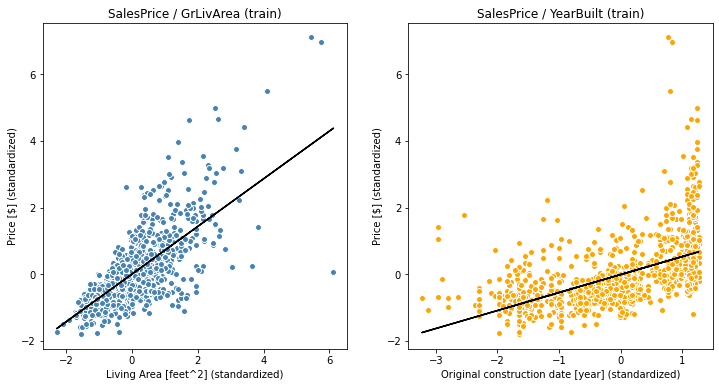

< test data >


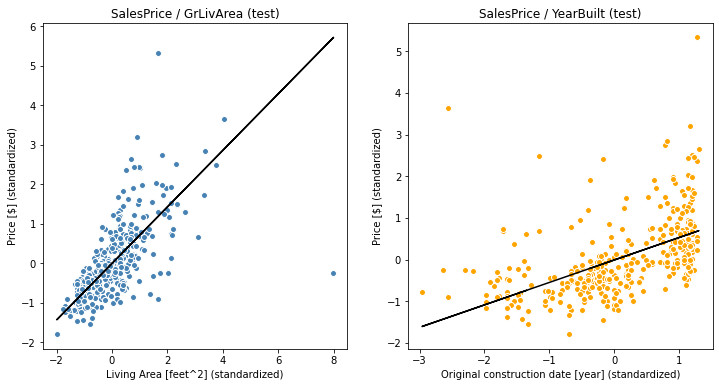

< Metrics (test data) >
MSE : 0.384
R^2 : 0.546


In [24]:
# 線形回帰
from sklearn.linear_model import SGDRegressor
print("=== Logistic Regression ===\n")

# データ取得
X = df_house.iloc[:, :-1].values
y = df_house.iloc[:, -1].values

# 分割
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.75)

# 回帰のため、目的変数も標準化
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_x.fit(X_train)
sc_y.fit(y_train[:, np.newaxis])
X_train_std = sc_x.transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()

# 可視化のため変数毎と全体の3つを学習
X1_train_std = X_train_std[:, 0][:, np.newaxis]
X2_train_std = X_train_std[:, 1][:, np.newaxis]
sgr = SGDRegressor()
sgr_1 = SGDRegressor()
sgr_2 = SGDRegressor()
sgr.fit(X_train_std, y_train_std)
sgr_1.fit(X1_train_std, y_train_std)
sgr_2.fit(X2_train_std, y_train_std)

# 可視化
# 訓練データ
regression_visualize(X_train_std, y_train_std, 
                     model_name='train data', 
                     models=[sgr_1, sgr_2], 
                     titles=['SalesPrice / GrLivArea (train)', 'SalesPrice / YearBuilt (train)'],
                     colors=['steelblue', 'orange'],
                     xlabels=['Living Area [feet^2] (standardized)', 'Original construction date [year] (standardized)'],
                     ylabel='Price [$] (standardized)')
# 検証データ
regression_visualize(X_test_std, y_test_std, 
                     model_name='test data', 
                     models=[sgr_1, sgr_2], 
                     titles=['SalesPrice / GrLivArea (test)', 'SalesPrice / YearBuilt (test)'],
                     colors=['steelblue', 'orange'],
                     xlabels=['Living Area [feet^2] (standardized)', 'Original construction date [year] (standardized)'],
                     ylabel='Price [$] (standardized)')

# 評価(平均二乗誤差、決定係数)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("< Metrics (test data) >")
y_test_pred = sgr.predict(X_test_std)
MSE = mean_squared_error(y_test_std, y_test_pred)
print('MSE : {:.3f}'.format(MSE))
R2 = r2_score(y_test_std, y_test_pred)
print('R^2 : {:.3f}'.format(R2))